In [1]:
import becquerel as bq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

spec1 = bq.Spectrum.from_file('../tests/samples/digibase_5min_30_1.spe')

SpeFile: Reading file ../tests/samples/digibase_5min_30_1.spe


/Users/jvavrek/becquerel/becquerel/parsers/spectrum_file.py:136: SpectrumFileParsingWarning: Spectrum will be initated without an energy calibration;invalid calibration, energies not monotonically increasing.
  SpectrumFileParsingWarning)


In [2]:
#plt.rc('text', usetex=True)

//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

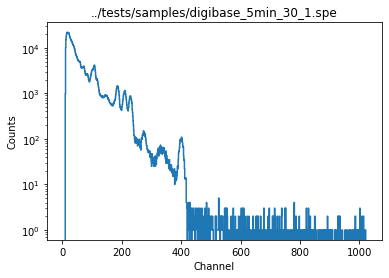

<Figure size 432x288 with 0 Axes>

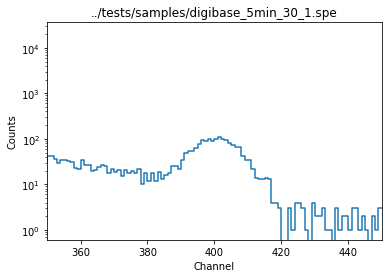

In [3]:
spec1.plot(yscale='log')
plt.figure()
spec1.plot(yscale='log', xlim=(350, 450))
plt.show

In [4]:
model = (bq.fitting.GaussModel(prefix='gauss0_') + bq.fitting.ExpModel(prefix='exp_'))

//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
fitter = bq.Fitter(
    model,
    x=spec1.channels,
    y=spec1.counts_vals,
    y_unc=spec1.counts_uncs,
    roi=(350, 450)
)
fitter.fit()

/Users/jvavrek/becquerel/becquerel/core/spectrum.py:386: DeprecationWarning: channels is deprecated terminology and will be removed in a future release. Use bin_indices instead.
  DeprecationWarning)


[[Model]]
    (Model(gauss, prefix='gauss0_') + Model(exp, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 156
    # data points      = 101
    # variables        = 5
    chi-square         = 83.0792282
    reduced chi-square = 0.86540863
    Akaike info crit   = -9.72790663
    Bayesian info crit = 3.34769595
[[Variables]]
    gauss0_amp:    1507.37441 +/- 41.1186780 (2.73%) (init = 2594)
    gauss0_mu:     399.944075 +/- 0.17288325 (0.04%) (init = 400)
    gauss0_sigma:  6.21317386 +/- 0.15296532 (2.46%) (init = 5)
    exp_amp:       71902591.7 +/- 49817532.0 (69.28%) (init = 431168.2)
    exp_lam:      -24.3599118 +/- 1.12528889 (4.62%) (init = -37.8928)
    gauss0_fwhm:   14.6309063 +/- 0.36020580 (2.46%) == '2.3548200450309493 * gauss0_sigma'
[[Correlations]] (unreported correlations are < 0.100)
    C(exp_amp, exp_lam)         =  0.999
    C(gauss0_sigma, exp_lam)    =  0.338
    C(gauss0_sigma, exp_amp)    =  0.329
    C(gauss0_amp, e

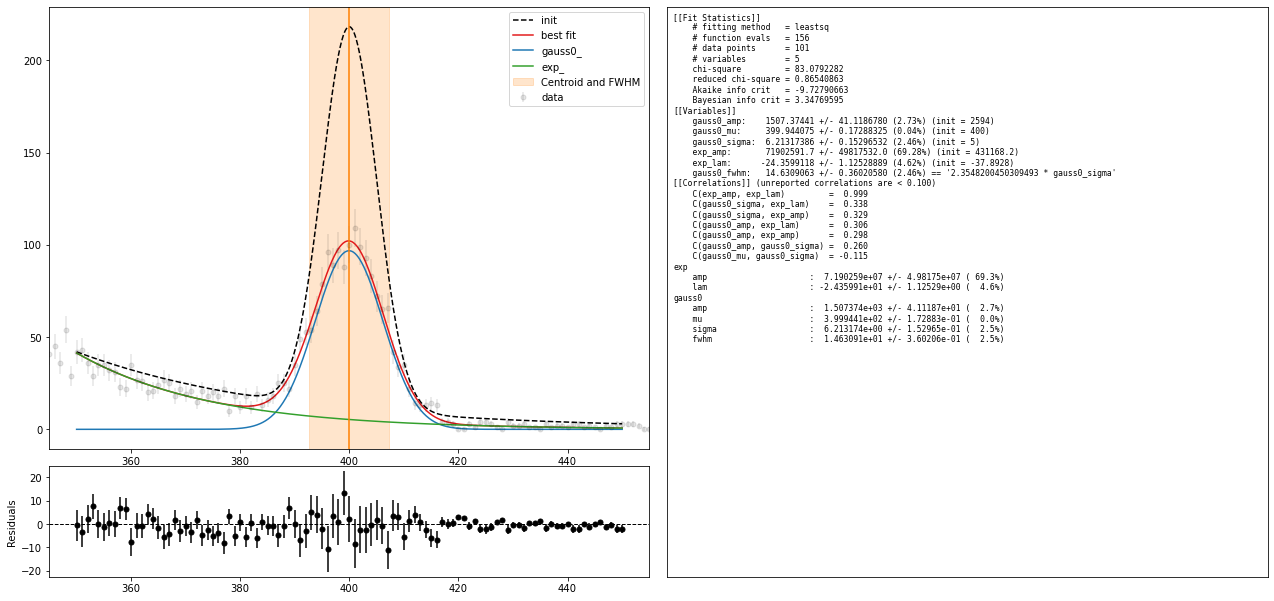

In [6]:
fitter.custom_plot();

//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jvavrek/becquerel/becquerel/core/fitting.py:696: RuntimeWarning: divide by zero encountered in true_divide
  y_plot = y_res / self.y_roi
/Users/jvavrek/becquerel/becquerel/core/fitting.py:697: RuntimeWarning: divide by zero encountered in true_divide
  yerr_plot = self.y_unc_roi / self.y_roi
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3411: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(data, a, lolims)]


[[Model]]
    (Model(gauss, prefix='gauss0_') + Model(exp, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 156
    # data points      = 101
    # variables        = 5
    chi-square         = 83.0792282
    reduced chi-square = 0.86540863
    Akaike info crit   = -9.72790663
    Bayesian info crit = 3.34769595
[[Variables]]
    gauss0_amp:    1507.37441 +/- 41.1186780 (2.73%) (init = 2594)
    gauss0_mu:     399.944075 +/- 0.17288325 (0.04%) (init = 400)
    gauss0_sigma:  6.21317386 +/- 0.15296532 (2.46%) (init = 5)
    exp_amp:       71902591.7 +/- 49817532.0 (69.28%) (init = 431168.2)
    exp_lam:      -24.3599118 +/- 1.12528889 (4.62%) (init = -37.8928)
    gauss0_fwhm:   14.6309063 +/- 0.36020580 (2.46%) == '2.3548200450309493 * gauss0_sigma'
[[Correlations]] (unreported correlations are < 0.100)
    C(exp_amp, exp_lam)         =  0.999
    C(gauss0_sigma, exp_lam)    =  0.338
    C(gauss0_sigma, exp_amp)    =  0.329
    C(gauss0_amp, e

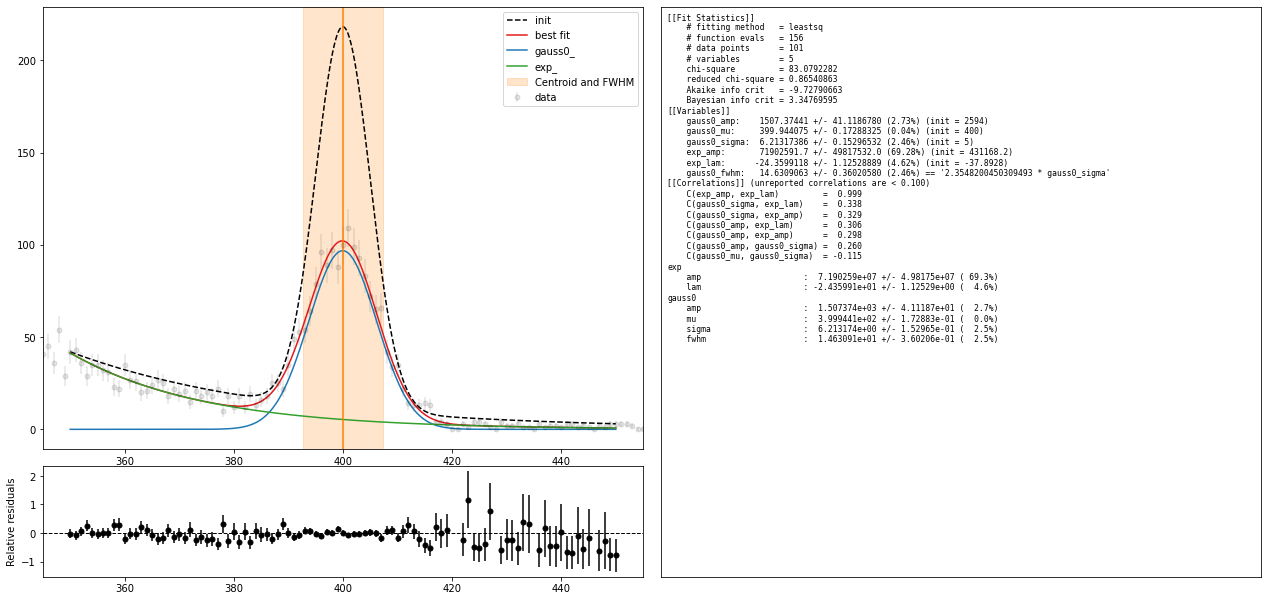

In [7]:
fitter.custom_plot(norm_residuals=True);